In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import os, fnmatch

In [2]:
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        folder = []
        for name in files:
            if fnmatch.fnmatch(os.path.join(root, name), pattern):
                folder.append(os.path.join(root, name))
        if len(folder) > 0:
            folder.sort()
            result.append(folder)
    result.sort()
    return result

def plot_data(paths, xlabel, ylabel):
    for folder in paths:
        if len(folder) > 1:
            ax = plt.gca()
            for key,path in enumerate(folder):
                ax = pd.read_csv(path, sep=' ', header=None).plot(x=0, y=1, ax=ax, alpha=0.7, label=path.split('/')[3], figsize=(10, 5))
            ax.set_title(folder[0].split('/')[2])
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            # plt.xlim(left=100, right=200)
            plt.show()
        else:
            path = folder[0]
            pd.read_csv(path, sep=' ', header=None).plot(x=0, y=1, alpha=0.7, title=path.split('/')[2], label=path.split('/')[3], figsize=(10, 5))
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            # plt.xlim(left=100, right=200)
            plt.show()

root = '../bbr-results/'
folder = '*' + 'bbr_cubic_10ms/*'

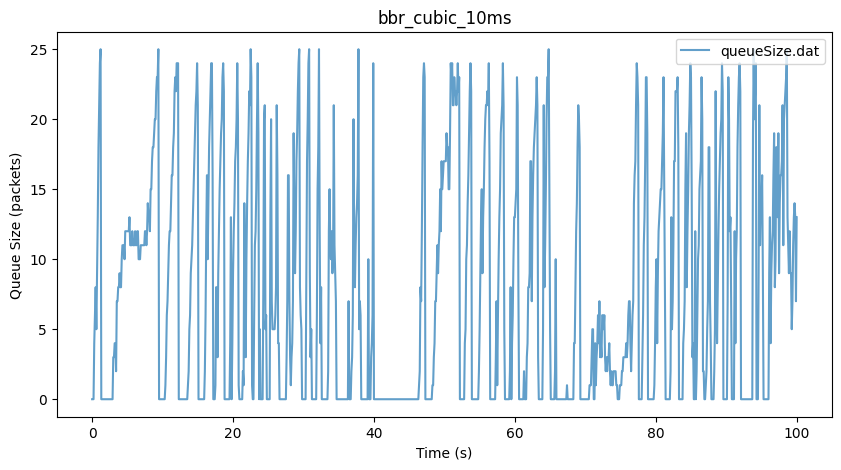

In [3]:
paths = find(folder+'queueSize*', root)
plot_data(paths, "Time (s)", "Queue Size (packets)")

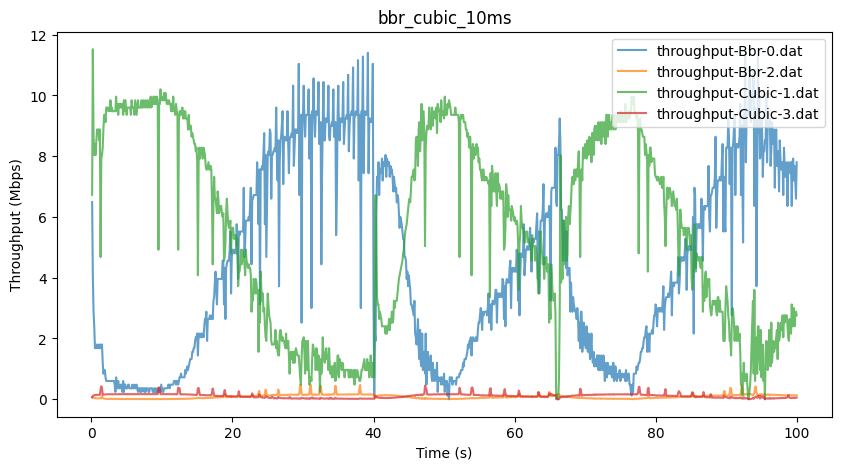

In [4]:
paths = find(folder+'throughput*', root)
plot_data(paths, "Time (s)", "Throughput (Mbps)")

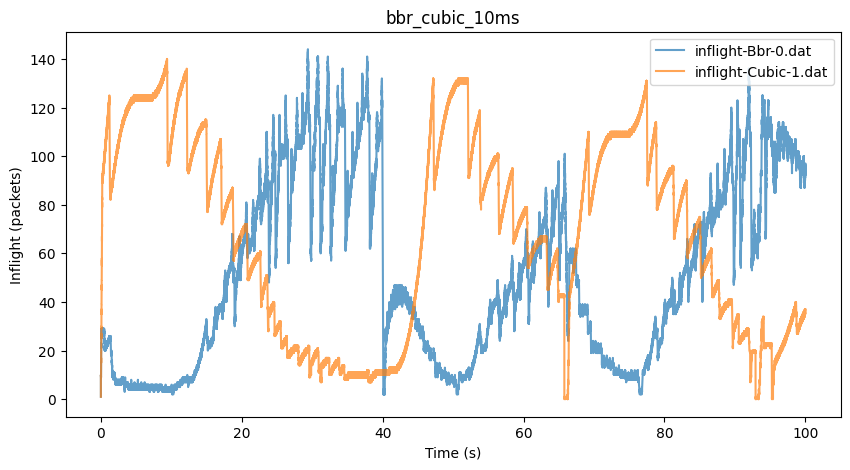

In [5]:
paths = find(folder+'inflight*', root)
plot_data(paths, "Time (s)", "Inflight (packets)")

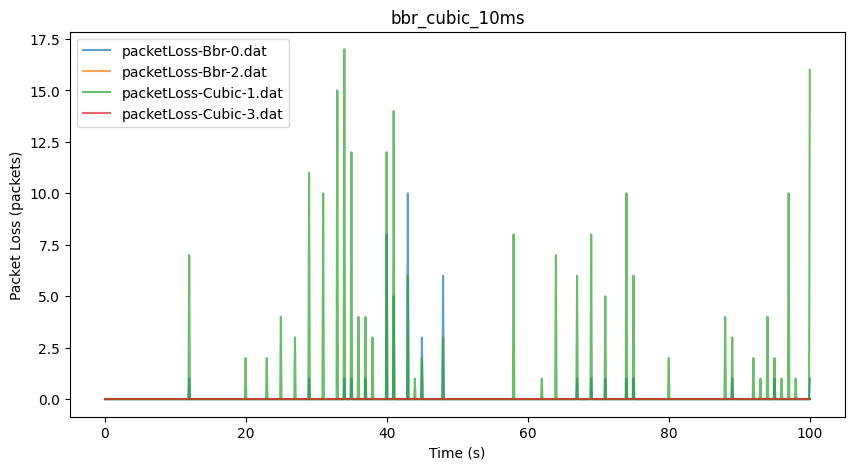

In [6]:
paths = find(folder+'packetLoss*', root)
plot_data(paths, "Time (s)", "Packet Loss (packets)")

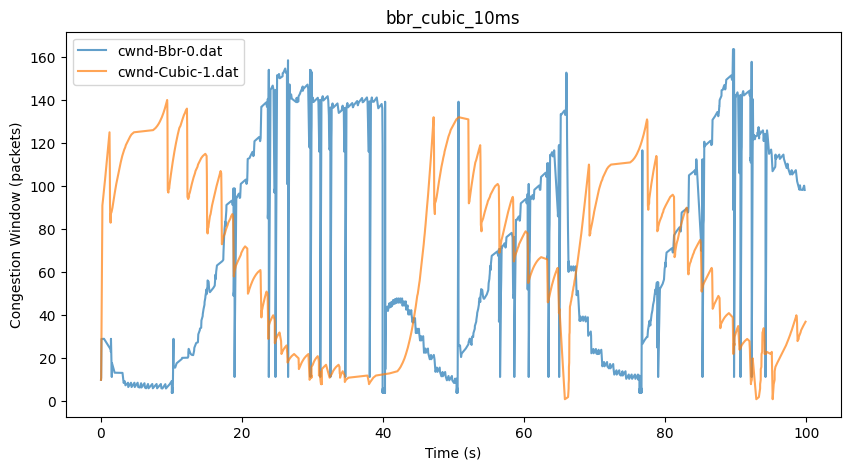

In [7]:
paths = find(folder+'cwnd*', root)
plot_data(paths, "Time (s)", "Congestion Window (packets)")

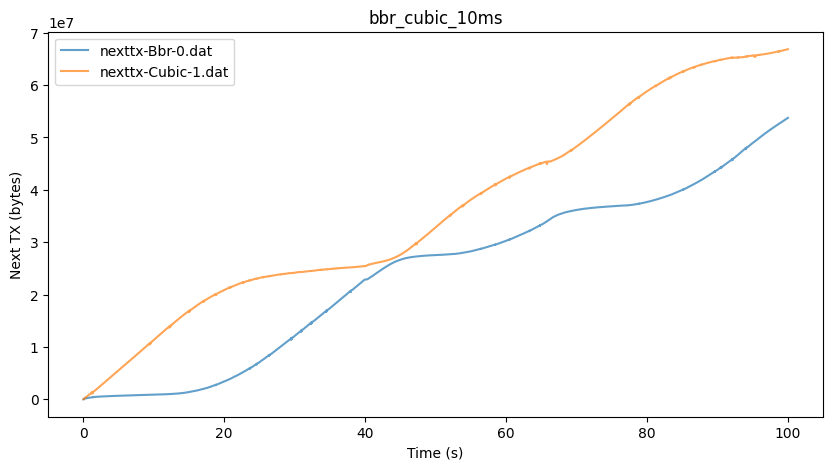

In [8]:
paths = find(folder+'nexttx*', root)
plot_data(paths, "Time (s)", "Next TX (bytes)")

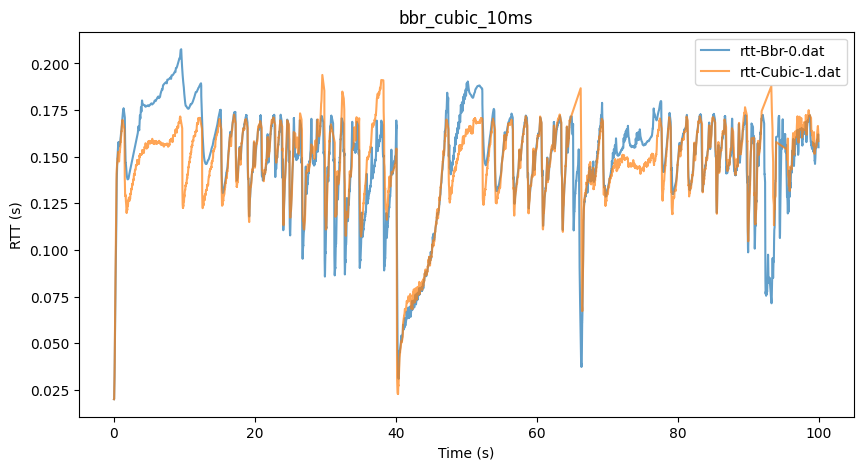

In [9]:
paths = find(folder+'rtt*', root)
plot_data(paths, "Time (s)", "RTT (s)")

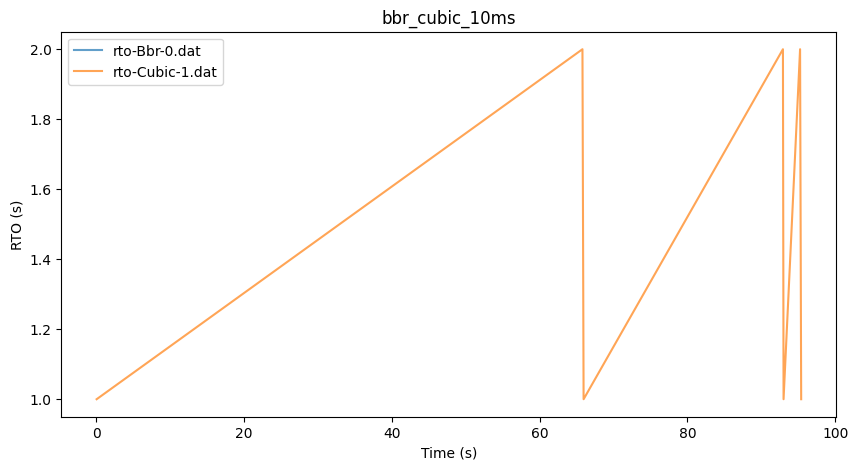

In [10]:
paths = find(folder+'rto*', root)
plot_data(paths, "Time (s)", "RTO (s)")